In [3]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import matplotlib.colors as mcl

In [4]:
data = pd.read_csv('C:/Users/yjss1/Desktop/e스포츠 데이터 분석가 양성과정/BIPA_data.csv',index_col = 0)
champStat = pd.read_csv('C:/Users/yjss1/Desktop/e스포츠 데이터 분석가 양성과정/champ_stats.csv',index_col=0)

In [5]:
# data = data[data['result'] != 'UNKNOWN']

In [6]:
tierPoint = {'I':0 , 'B':400, 'S':800, 'G':1200, 'P':1600, 'D':2000, 'M':2400, 'R':2800, 'C':3200}
inv_tierPoint = {0:'I',  1:'B', 2:'S', 3:'G', 4:'P', 5:'D', 6:'M', 7:'R', 8:'C'}

In [7]:
def get_meanTier(gameId):
    
    summonerRank = data[data['gameId']==gameId]['tierRank']
    cnt = 0
    pointSum = 0
    
    for tier in summonerRank:
        try:
            pointSum += tierPoint[tier[0]]
            pointSum += (4-int(tier[1]))*100
            cnt += 1
        except:
            pass
    
    if cnt == 0:
        return "0000"
        
    pointSum /= cnt
    tier = inv_tierPoint[int(pointSum/400)]
    division = math.ceil((400-pointSum%400)/100)
    temp = tier + str(division)

    return temp

In [8]:
nanTierList_idx = data[data['tierRank'].isnull()].index

In [9]:
for idx in nanTierList_idx:
    data.at[idx, 'tierRank'] = get_meanTier(data.iloc[idx]['gameId'])

In [10]:
data['tier'] = data['tierRank'].str[0]
data['division'] = data['tierRank'].str[1]
data = data.drop(['tierRank'], axis=1)
data.head(3)

,gameId,createDate,position,teamId,summonerId,championId,result,level,championsKilled,numDeaths,...,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version,tier,division
0,5383880006,2021-08-11 06:59:31,S,200,3210877,99,WIN,10,4,1,...,0,11,2830,2181,2181,NONE,972,11.16.390.1945,P,3
1,5383880006,2021-08-11 06:59:31,S,100,7550211,35,LOSE,8,1,3,...,2,24,2013,0,0,NONE,972,11.16.390.1945,P,4
2,5383880006,2021-08-11 06:59:31,M,200,9306696,266,WIN,11,5,1,...,0,15,6158,585,585,NONE,972,11.16.390.1945,P,3


In [11]:
for i in tierPoint.keys():
    data.loc[data['tier']==i,'mmr'] = tierPoint[i] + (4 - pd.to_numeric(data['division'])) * 100

In [12]:
data = data[['tier', 'division', 'mmr', 'position', 'level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']]

In [13]:
nanidx = data[data['tier']=='0'].index
data = data.drop(nanidx)

In [14]:
################################################################

In [15]:
data.head(3)

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,972


In [16]:
data = data[data['gameLength'] >= 600]

In [17]:
data

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,972
3,P,4,1600.0,T,11,115,8,2,1,5,1,0,7972,10963,972
4,P,3,1700.0,A,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,1100.0,S,15,29,1,11,7,29,4,7,8451,10019,2379
999996,G,4,1200.0,M,18,251,10,6,3,8,0,1,18291,37581,2379
999997,G,4,1200.0,J,17,40,5,5,22,13,3,2,12986,20994,2379
999998,S,1,1100.0,A,17,260,6,5,3,11,1,4,15674,37078,2379


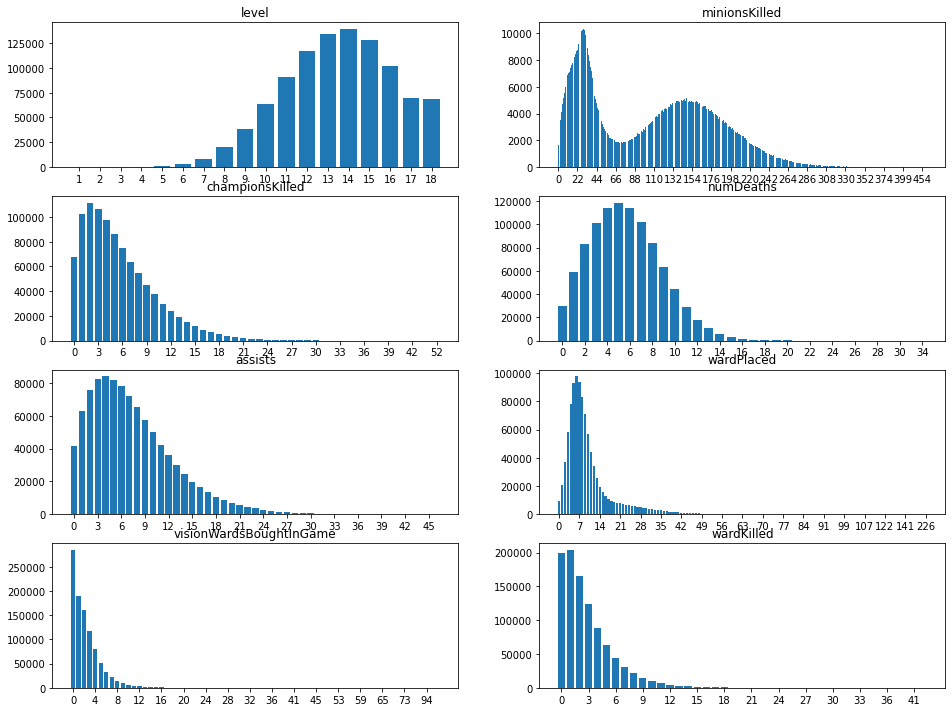

In [18]:
# 이상치 제거 전 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

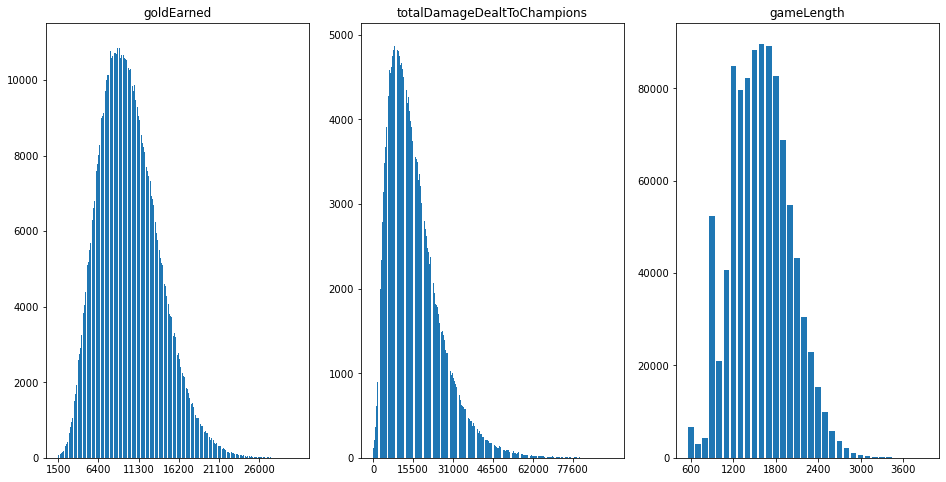

In [19]:
# 이상치 제거 전 그래프
ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [20]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [21]:
# processed_data : 이상치가 제거된 데이터 

processed_data = data
want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]   

C:\Users\yjss1\AppData\Local\Temp/ipykernel_5424/4274930411.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]


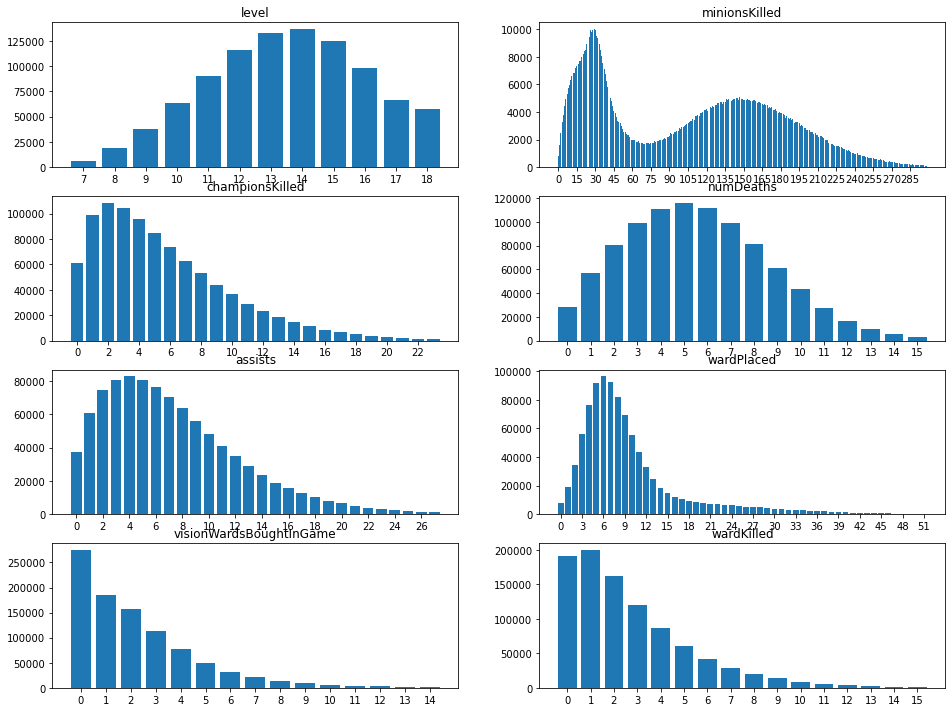

In [22]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = processed_data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

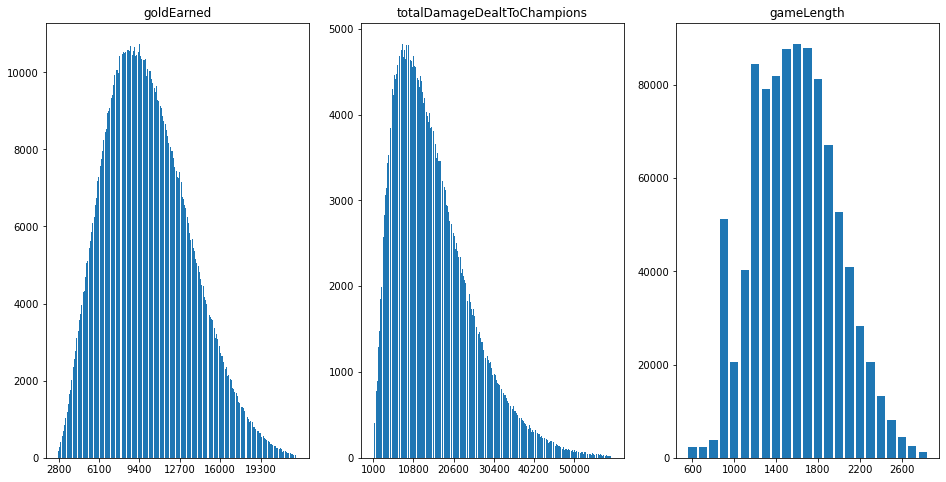

In [23]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = processed_data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [24]:
processed_data['gameLength'] /= 60

In [25]:
processed_data

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,16.20
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,16.20
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,16.20
3,P,4,1600.0,T,11,115,8,2,1,5,1,0,7972,10963,16.20
4,P,3,1700.0,A,10,110,3,2,9,5,1,2,7552,6465,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,1100.0,S,15,29,1,11,7,29,4,7,8451,10019,39.65
999996,G,4,1200.0,M,18,251,10,6,3,8,0,1,18291,37581,39.65
999997,G,4,1200.0,J,17,40,5,5,22,13,3,2,12986,20994,39.65
999998,S,1,1100.0,A,17,260,6,5,3,11,1,4,15674,37078,39.65


In [26]:
for it in processed_data.columns[4:len(processed_data.columns)-1]:
    processed_data[it] /= processed_data['gameLength']
processed_data = processed_data.drop(columns='gameLength')

In [27]:
processed_data.head(3)

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions
0,P,3,1700.0,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728
1,P,4,1600.0,S,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568
2,P,3,1700.0,M,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716


In [28]:
# 확인하고 싶은 아이디 입력
# 영어로 된 아이디는 대소문자 구분해야함

summoner_name = '내가잘했구나'

In [29]:
# selenium을 백그라운드로 실행하기 위해 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')

In [31]:
# selenium으로 실행시킬 url설정
summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name
chrome_driver_path = "C:/Users/yjss1/Desktop/chromedriver_win32/chromedriver.exe"
driver = webdriver.Chrome(chrome_driver_path)

driver.get(summoner_url)

C:\Users\yjss1\AppData\Local\Temp/ipykernel_5424/2072977982.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver_path)


In [32]:
# 솔로랭크의 자료만을 원하므로, 솔로랭크 버튼 클릭
solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")
solo_rank_button.click()
time.sleep(2)

C:\Users\yjss1\AppData\Local\Temp/ipykernel_5424/2064555884.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")


In [33]:
# 컨테이너의 정보들은, start가 3부터 시작해서, 1씩 더해지며 쌓인다.
# 각 컨테이너 마다 (+) 버튼 눌러주는 코드
start = 3
while True:
    try:
        driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()
        time.sleep(2)
        start += 1
    
    except Exception as e:
        pass
        break

C:\Users\yjss1\AppData\Local\Temp/ipykernel_5424/48261511.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()


In [34]:
# 전체 펼친 html
summoner_html = driver.page_source
summoner_soup = BeautifulSoup(summoner_html, 'html.parser')

In [35]:
driver.quit()

In [36]:
# 내 티어 정보
mysolorank_info = list(summoner_soup.select('div.summoner-tier__description'))[0]
mytier = list(mysolorank_info.stripped_strings)[0]
mylst = mytier.split('\n')

tierdict = {'아이언' : 'I', '브론즈' : 'B', '실버' : 'S', '골드' : 'G', '플래티넘' : 'P', 
 '다이아몬드' : 'D', '마스터' : 'M', '그랜드마스터' : 'R', '챌린저' : 'C'}

my_tier = tierdict[mylst[0]]
my_division = mylst[1].lstrip()
print(my_tier, my_division)

G 2


In [37]:
# 불러오는 게임의 수
# games_len = len(summoner_games_html)

summoner_games_html = summoner_soup.select('div.match-history__content')
games_len = 20

In [38]:
# 확인하고 싶은 자료 선정
Damage = []
CS = []
Wardplaced = []
visionWardplaced = []
WardKilled = []
Kill = []
Death = []
Assist = []
Level = []
Gold = []
Gamelength = []
Position = []

In [39]:
# 각각의 정보들을 각 리스트에 담아준다.

for i in range(games_len):
    Level.append(int(list(summoner_games_html[i].select_one('div.champion').stripped_strings)[0]))
    CS.append(int(list(summoner_games_html[i].select_one('div.info').stripped_strings)[3]))
    Kill.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[0]))
    Death.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[2]))
    Assist.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[4]))
    Wardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[1]))
    visionWardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[0]))
    WardKilled.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[2]))
    gl = list(summoner_games_html[i].select_one('span.mt-md-1'))[0].split(':')
    Gamelength.append(int(gl[0])*60 + int(gl[1]))

In [40]:
# 각 게임의 '자세히보기' 버튼을 눌러야 나오는 정보들을 담는 코드

summoner_results_html = summoner_soup.select('div.match-history__result')
for i in range(games_len):
    if list(summoner_results_html[i].stripped_strings)[0] == '패배':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners'
    elif list(summoner_results_html[i].stripped_strings)[0] == '승리':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners'
    gold = list(summoner_details_html[i].select_one(gold_selector).stripped_strings)[0]
    damage = list(summoner_details_html[i].select_one(damage_selector).stripped_strings)[0]
    
    position = ['T' ,'J', 'M', 'A', 'S']
    for j in range(5):
        if summoner_name in list(summoner_details_html[i].select_one(position_selector).stripped_strings)[17*j:17*(j+1)]:
            Position.append(position[j])
            break
            
    if gold[-1] == '천':
        g = float(gold[:-1])
        g = int(g * 1000)
        Gold.append(g)
        
    elif gold[-1] == '만':
        g = float(gold[:-1])
        g = int(g * 10000)
        Gold.append(g)
        
    if ',' in damage:
        damage = damage.replace(',', '')
    damage = int(damage)
    Damage.append(damage)
    
    time.sleep(1)

In [41]:
# mydf : 내 게임전적 데이터를 저장한 df
# ['Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Gamelength']

mydf = pd.DataFrame({'tier' : my_tier, 'division' : my_division, 'Position' : Position, 'Kill' : Kill, 'Death' : Death, 'Assist' : Assist,
                    'CS' : CS, 'Level' : Level, 'Damage' : Damage, 'Wardplaced' : Wardplaced,
                   'visionWardplaced' : visionWardplaced, 'WardKilled' : WardKilled,
                     'Gold' : Gold, 'Gamelength' : Gamelength})
mydf

,tier,division,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold,Gamelength
0,G,2,M,2,3,1,159,12,7032,8,3,1,8000,1212
1,G,2,A,7,7,0,152,11,13147,2,1,2,9600,1298
2,G,2,M,22,8,8,197,17,35649,4,3,3,17000,1888
3,G,2,A,3,3,16,365,18,25381,10,3,6,16000,2136
4,G,2,A,4,0,0,85,7,2160,2,0,2,5000,613
5,G,2,A,7,4,5,147,11,11408,4,2,4,8700,1081
6,G,2,M,9,8,3,132,13,17335,6,2,1,9500,1321
7,G,2,A,3,6,7,239,14,18912,13,4,3,11000,1727
8,G,2,A,11,5,4,236,14,17790,9,0,9,14000,1777
9,G,2,A,3,8,1,132,10,10505,8,3,1,6900,1204


In [42]:
# 내 mmr을 구하는 과정과 mmr이 추가된 mydf

for i in tierPoint.keys():
    mydf.loc[mydf['tier']==i,'mmr'] = tierPoint[i] + (4 - pd.to_numeric(mydf['division'])) * 100
my_mmr = mydf['mmr'][0]

mydf = mydf[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Gamelength']]
mydf

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold,Gamelength
0,G,2,1400,M,2,3,1,159,12,7032,8,3,1,8000,1212
1,G,2,1400,A,7,7,0,152,11,13147,2,1,2,9600,1298
2,G,2,1400,M,22,8,8,197,17,35649,4,3,3,17000,1888
3,G,2,1400,A,3,3,16,365,18,25381,10,3,6,16000,2136
4,G,2,1400,A,4,0,0,85,7,2160,2,0,2,5000,613
5,G,2,1400,A,7,4,5,147,11,11408,4,2,4,8700,1081
6,G,2,1400,M,9,8,3,132,13,17335,6,2,1,9500,1321
7,G,2,1400,A,3,6,7,239,14,18912,13,4,3,11000,1727
8,G,2,1400,A,11,5,4,236,14,17790,9,0,9,14000,1777
9,G,2,1400,A,3,8,1,132,10,10505,8,3,1,6900,1204


In [43]:
# my_processed_data : 나의 포지션별 분당 데이터

my_processed_data = mydf.groupby('Position').mean()

my_processed_data['Gamelength'] /= 60

for col in my_processed_data.columns[1:]:
    my_processed_data[col] /= my_processed_data['Gamelength']

my_processed_data = my_processed_data.drop('Gamelength', axis = 1)
my_processed_data

,mmr,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Position,,,,,,,,,,,
A,1400.0,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
M,1400.0,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [44]:
my_processed_data = my_processed_data.reset_index()
my_processed_data.index = ['Me'] * len(my_processed_data)

# my_processed_data에 위에서 구한 내 티어와 division을 추가하고, 순서에 맞게 정렬한다
my_processed_data['tier'] = my_tier
my_processed_data['division'] = my_division
my_processed_data = my_processed_data[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]
my_processed_data

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
Me,G,2,1400.0,M,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [45]:
# processed_data : 전체 데이터의 분당 데이터
# processed_data column의 이름과 순서를 바꾸어준다.

processed_data = processed_data.rename(columns = {'position' : 'Position',
                                'level' : 'Level',
                                'minionsKilled' : 'CS',
                                'championsKilled' : 'Kill',
                                'numDeaths' : 'Death',
                                'assists' : 'Assist',
                                'wardPlaced' : 'Wardplaced',
                                'visionWardsBoughtInGame' : 'visionWardplaced',
                                'wardKilled' : 'WardKilled',
                                'goldEarned' : 'Gold',
                                'totalDamageDealtToChampions' : 'Damage'})

processed_data = processed_data[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]

In [46]:
#====================================================

In [47]:
# 그다음으로 자기 주변 mmr에서의 지표별 상위 퍼센트를 알아볼 것인데,
# mmr 분포를 살펴보면,
#sorted(data['mmr'].unique())
# 아이언~다이아1까지는 0~2300의 값으로 분포되어있고,
# 마스터, 그랜드마스터, 챌린저는 각각 2700, 3100, 3500의 값이다.
# 다이아2는 다이아4~다이아1,
# 다이아1은 다이아3~ 마스터,
# 마스터는 다이아1~그랜드마스터
# 그랜드마스터는 마스터~챌린저
# 챌린저는 그랜드마스터~마스터 끼리,
# 나머지 티어들은 위아래로 각각 2티어씩 차이나는 mmr로 '주변 mmr'을 설정하였다.

In [48]:
# ================함수사용========================

In [49]:
def mystat(Data, myData, position = 'all', tierCnt = 100):
  
    # tierCnt = 1 : mytier ±1
    # tierCnt = 2 : mytier ±2

    if position != 'all':
        Data = Data[Data['Position'] == position]

    if tierCnt != 100:
        mmr = int(myData['mmr'])
        Data = Data[(mmr-tierCnt*100 <= Data['mmr']) & (Data['mmr'] <= mmr+tierCnt*100)]

    total = pd.concat([Data, myData])

    rankData = total.rank(ascending = False, pct = True)
    
    # 데스는 적을수록 좋으므로, ascending = True를 적용한다.
    rankData['Death'] = total['Death'].rank(ascending = True, pct = True)
    myRankData = rankData[rankData.index == 'Me']
    myRankData = round(myRankData, 2)
    myRankData *= 100

    myRankData = myRankData[['Kill', 'Death', 'Assist', 'CS','Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]
    return myRankData

In [63]:
# 데이터를 Heatmap을 이용하여 시각화해주는 함수이다.

def draw(data):
    # annot에 들어갈 설정을 정해준다. (각 박스 안에 들어갈 내용 정해줌)
    ann = []

    lst = ['킬', '데스', '어시', 'CS', '레벨', '딜량', '와드설치', '제어와드구매', '와드제거', '골드']
    for ind in data.index:
        arr = []
        line = data[data.index == ind]
        for i in range(len(line.columns)):
            percent = line[line.columns[i]][0]
            percent = lst[i] + '\n' + '\n' + '상위 ' + str(percent) + '%'
            arr.append(percent)

        ann.append(arr)
    #==============================================
    
    # 그래프에 한글을 표기하기 위한 세팅
    from matplotlib import font_manager, rc
    font_path = 'C:/Windows/Fonts/gulim.ttc'
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
    # ==============================================
    plt.figure(figsize = (20, 4))
    sns.heatmap(data, vmin = 20, vmax = 80, annot= ann, annot_kws = {'size' : 15}, 
                xticklabels= False, yticklabels = True, linewidths = 0.5, fmt = '', cmap = 'Reds')

In [64]:
mypos = []
for p in my_processed_data['Position']:
    mypos.append(p)

df = pd.DataFrame()
for pos in mypos:
    p = mystat(processed_data, my_processed_data[my_processed_data['Position'] == pos], pos)
    p.set_index([[pos]], inplace = True)
    p = p.astype(int)
    df = pd.concat([df, p])
df

,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
A,39,56,47,9,57,25,26,36,24,32
M,11,69,57,22,27,23,62,24,43,18


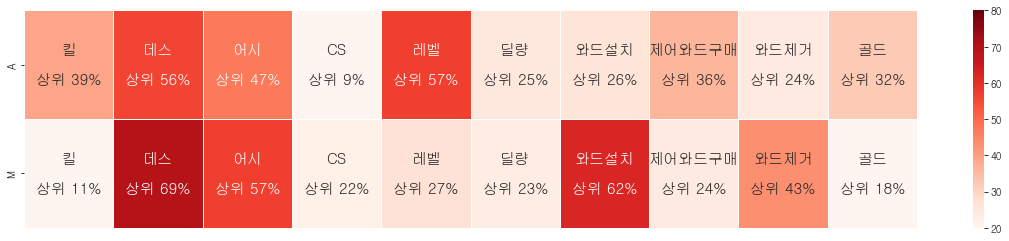

In [65]:
# mmr 관계없는 그래프
draw(df)

In [ ]:
# 시각화 자료들의 상위 % 는 모두 '분당' 기준이다.
# 평균보다 좋은 성적을 거두는 지표일수록, 밝은 색이다.
# 시뻘건색일수록, 개선해야할 부분이다.
# 평균에 가까울수록, 주황색이다.

In [66]:
def createmydf(mmr):
    mypos = []
    for p in my_processed_data['Position']:
        mypos.append(p)

    df = pd.DataFrame()
    for pos in mypos:
        p = mystat(processed_data, my_processed_data[my_processed_data['Position'] == pos], pos, mmr)
        p.set_index([[pos]], inplace = True)
        p = p.astype(int)
        df = pd.concat([df, p])

    return df

In [67]:
mmrdf = createmydf(4)

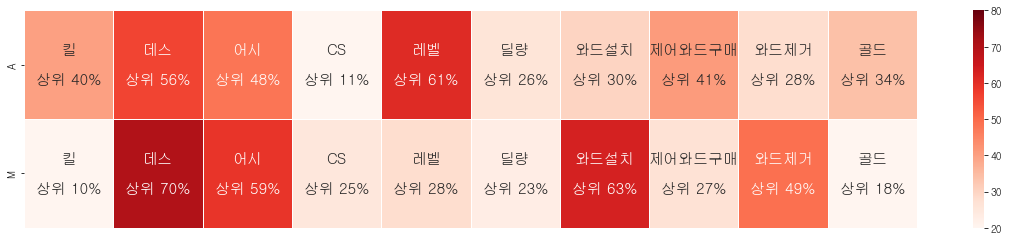

In [68]:
# 주변 mmr이 들어간 그래프
draw(mmrdf)